# SC207 - Session 7
# APIs - Exploring and Summarising Twitter Data
<img src="https://github.com/Minyall/sc207_materials/blob/master/images/tweepy.jpg?raw=true" align="right" width="300">


What kinds of exploratory analysis can we run on social media data? This session covers various examples of the kinds of insights that can be gathered through the analysis of social media data, and how to present those results.

[Tweepy Documentation](http://docs.tweepy.org/en/stable/)

## Section b) Exploring your data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def tweet_url(row):
    return f"https://twitter.com/{row['user.screen_name']}/status/{row['id']}"

In [3]:
df = pd.read_pickle('example_twitter_data_unpacked.pkl')
len(df)

24214

In [4]:
original_tweets_filter = df['retweeted_status.id'].isna()
df = df[original_tweets_filter]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4658 entries, 2 to 24213
Columns: 352 entries, created_at to coordinates.coordinates
dtypes: bool(15), float64(75), int64(9), object(253)
memory usage: 12.1+ MB


## Explorations: Favourite Tweets
A simple one to begin with. Which tweets got the most 'favourites' or hearts?
Let's look at the top 10

In [6]:
subset = ['id','user.screen_name','user.followers_count','favorite_count','retweet_count','full_text']

top_favs = df[subset].sort_values(by='favorite_count', ascending=False).head(5)

for index_number, row in top_favs.iterrows():
    
    print('*'*10)
    print("INDEX:", index_number)
    print("USER:", row['user.screen_name'])
    print("FAV:", row['favorite_count'])
    print("RT:", row['retweet_count'])
    print(row['full_text'])
    print(tweet_url(row))

**********
INDEX: 23211
USER: MrMichaelSpicer
FAV: 67764
RT: 21691
the room next door - Priti Patel https://t.co/kwgEdJKGLr
https://twitter.com/MrMichaelSpicer/status/1224619601738137600
**********
INDEX: 22995
USER: DeborahMeaden
FAV: 42614
RT: 4519
Priti Patel should resign (again) or be sacked. If you can’t read the effect you are having on people you are a pretty poor Manager let alone Minister.
https://twitter.com/DeborahMeaden/status/1329848910794383361
**********
INDEX: 22315
USER: mrjamesob
FAV: 40526
RT: 2398
Can’t believe Priti Patel is a bully. She seems so nice.
https://twitter.com/mrjamesob/status/1329694268718534656
**********
INDEX: 23346
USER: TwitOpOldFarts
FAV: 35400
RT: 6657
Priti Patel - the sort of person who would unplug your life support to charge her mobile phone
https://twitter.com/TwitOpOldFarts/status/1311376007375527939
**********
INDEX: 23568
USER: frankieboyle
FAV: 32650
RT: 5444
Priti Patel is like a candidate from a version of The Apprentice where you wa

If you prefer, you can always export subsets of your data like this one, to a csv file to easily view in Excel or similar.

In [7]:
top_favs

,id,user.screen_name,user.followers_count,favorite_count,retweet_count,full_text
23211,1224619601738137600,MrMichaelSpicer,401820,67764,21691,the room next door - Priti Patel https://t.co/...
22995,1329848910794383361,DeborahMeaden,424433,42614,4519,Priti Patel should resign (again) or be sacked...
22315,1329694268718534656,mrjamesob,755829,40526,2398,Can’t believe Priti Patel is a bully. She seem...
23346,1311376007375527939,TwitOpOldFarts,780,35400,6657,Priti Patel - the sort of person who would unp...
23568,1249007483571625987,frankieboyle,2824176,32650,5444,Priti Patel is like a candidate from a version...


In [8]:
top_favs.to_csv('top_favs.csv')

## The Skewed World of Twitter Interactivity
Whilst there are approximately 6,000 tweets posted per second, the vast majority of them recieve little attention. Tweet interaction tends to skew heavily such that the majority have 0 retweets/favorites/replies.

If we look above we can see a pretty swift drop in the number of interactions across the top tweets.

This can make exploring our data from social media difficult, particularly around these metrics, as often graphs will skew heavily around 0 with a few points then reaching 100,000 + interactions.

Because of the scale of the figures we're looking at, Pandas may use *scientific notation*, which is used to express very big numbers in a condensed format.

<img src="https://github.com/Minyall/sc207_materials/blob/master/images/scientific_notation.png?raw=true" align="left" width="300">


In [9]:
df[subset].describe()

,id,user.followers_count,favorite_count,retweet_count
count,4.658000e+03,4.658000e+03,4658.000000,4658.000000
mean,1.329150e+18,7.362115e+04,249.453199,50.468227
std,1.302000e+16,1.077477e+06,1964.622280,438.713522
min,6.522691e+17,0.000000e+00,0.000000,0.000000
25%,1.329705e+18,2.922500e+02,0.000000,0.000000
50%,1.329727e+18,1.393000e+03,2.000000,0.000000
75%,1.330118e+18,6.082000e+03,17.000000,4.000000
max,1.330160e+18,4.661536e+07,67764.000000,21691.000000


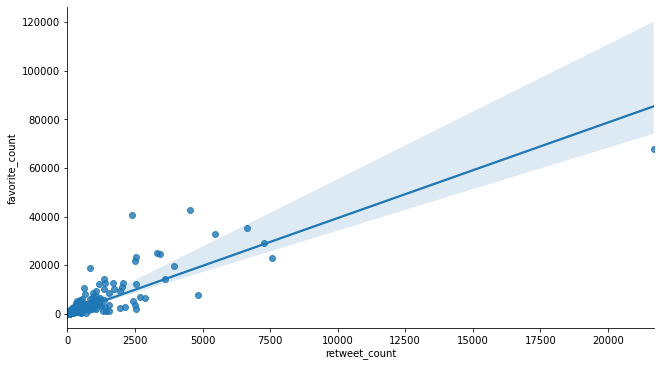

In [10]:
sns.lmplot(data=df,x='retweet_count',y='favorite_count')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

If we add some extra percentiles to `describe` we can see the values needed to enter...
 - 0.9: the top 10%
 - 0.99: the top 1%
 - 0.999: the top 0.1%

In [11]:
df[subset].describe(percentiles=[0.9,0.99,0.999])

,id,user.followers_count,favorite_count,retweet_count
count,4.658000e+03,4.658000e+03,4658.000000,4658.000000
mean,1.329150e+18,7.362115e+04,249.453199,50.468227
std,1.302000e+16,1.077477e+06,1964.622280,438.713522
min,6.522691e+17,0.000000e+00,0.000000,0.000000
50%,1.329727e+18,1.393000e+03,2.000000,0.000000
90%,1.330130e+18,3.043630e+04,181.000000,41.000000
99%,1.330137e+18,7.558273e+05,5015.240000,1072.310000
99.9%,1.330160e+18,7.653992e+06,30253.921000,5045.858000
max,1.330160e+18,4.661536e+07,67764.000000,21691.000000


From the numbers above we can compare whether favorites or retweets are more evenly distributed in this topic. We can visualise this difference using a `boxen` plot, a type of box plot that breaks the box up so that the width indicates the number of tweets that fall into that value range.

In [12]:
# We melt our data so that our data is in a shape that seaborn can understand for the plot we want
cat_plot_data = df[subset].melt(id_vars=['id'], value_vars=['favorite_count','retweet_count'])
cat_plot_data

,id,variable,value
0,1330137019679432707,favorite_count,0
1,1330137016881860610,favorite_count,0
2,1330136998124904449,favorite_count,0
3,1330136987232301058,favorite_count,0
4,1330136912443666432,favorite_count,0
...,...,...,...
9311,1329676144745074689,retweet_count,6
9312,1329556103982706690,retweet_count,2
9313,1329691585035051009,retweet_count,1
9314,1329691593373347843,retweet_count,2


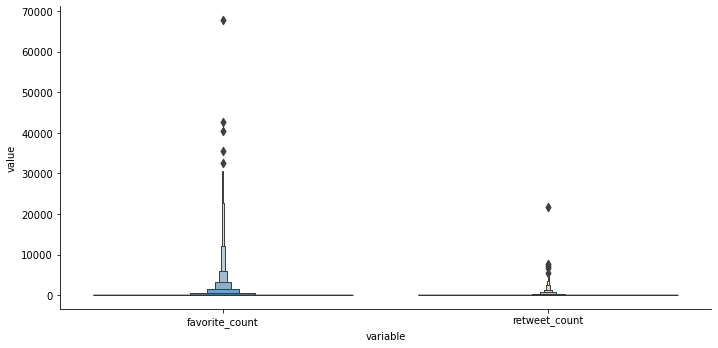

In [13]:
sns.catplot(data=cat_plot_data, x='variable',y='value',height=3.5, aspect=2.5, kind='boxen')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Because of the heavy skew there isn't even a clear trend when it comes to followers_count vs retweet count - which we might have expected.

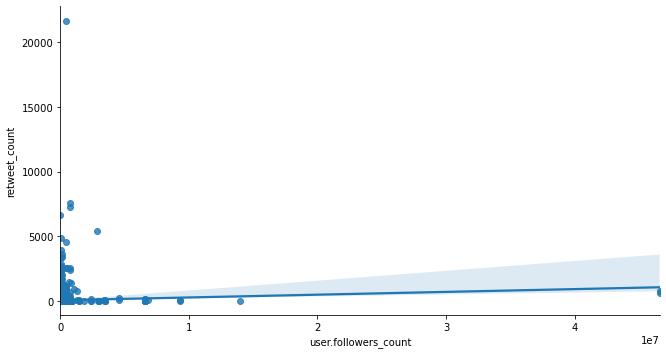

In [14]:
sns.lmplot(data=df,x='user.followers_count',y='retweet_count',fit_reg=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

We can check this to see which are the top tweets for retweet count, and which are top for follower count. It is not always the case that the highest follower counts mean the greatest interaction. Often it is accounts with pre-existing social capital that have high follower counts. This doesn't necessarily always result in high engagement with their content.

In [15]:
df.sort_values(by='retweet_count',ascending=False)[subset].head(10)

,id,user.screen_name,user.followers_count,favorite_count,retweet_count,full_text
23211,1224619601738137600,MrMichaelSpicer,401820,67764,21691,the room next door - Priti Patel https://t.co/...
23409,1201070052952416256,mrjamesob,755750,22861,7556,Politicians like Priti Patel &amp; Boris Johns...
23307,1326086243751432192,mrjamesob,755749,29003,7266,Hmm.\n\nCitizens of 32 countries previously en...
23346,1311376007375527939,TwitOpOldFarts,780,35400,6657,Priti Patel - the sort of person who would unp...
23568,1249007483571625987,frankieboyle,2824176,32650,5444,Priti Patel is like a candidate from a version...
24105,1279047724520869888,cathalmalone,2691,7931,4838,"I'm a pretty experienced immigration lawyer, b..."
22995,1329848910794383361,DeborahMeaden,424433,42614,4519,Priti Patel should resign (again) or be sacked...
23783,1326257138331758592,MsYellowHat,1951,19596,3940,Next to Priti Patel’s heart https://t.co/WfceE...
23183,1307768775773691904,munyachawawa,119387,14111,3604,Skepta explains THAT Priti Patel tweet with a ...
9991,1329782334145617924,Andrew_Adonis,137257,24628,3417,So what’s just happened in the Priti Patel cas...


In [16]:
df.sort_values(by='user.followers_count',ascending=False)[subset].head(10)

,id,user.screen_name,user.followers_count,favorite_count,retweet_count,full_text
23416,1329485313685729280,BBCBreaking,46615364,2185,601,Draft report says UK Home Secretary Priti Pate...
23191,1329752894107750400,BBCBreaking,46615227,3298,802,UK PM's adviser on ministerial code resigns as...
18321,1329705824009080839,ndtv,13983678,45,5,"Colleagues Defend ""Kind"" UK Minister Priti Pat..."
13473,1329718385379307521,guardian,9306616,18,10,UK politics live: public sector workers face p...
23245,1330098696525139968,guardian,9305904,334,78,Ken Clarke joins criticism of Boris Johnson's ...
23244,1329899856027070464,FinancialTimes,6791578,285,105,The FT View: Boris Johnson's refusal to accept...
22411,1329693923707674626,SkyNews,6587344,128,31,“It has all the hallmarks of a prime ministeri...
24181,1329685990450016256,SkyNews,6587342,28,9,“What I can tell you is what I know about Prit...
24017,1329641285750231043,SkyNews,6587316,60,11,Priti Patel: Labour demands full release of bu...
23966,1329492052472713222,SkyNews,6586889,596,160,BREAKING: Sky News understands a draft report ...


# #Hashtags
Examining the hashtags of your data can give you a sense of the discourses around a particular topic, and inform you of connectivity to other issues. The first step is to get the hashtags out of their nested data structure.

For each entry in `entities.hashtags` we see a list, which if it is not empty, contains a set of dictionaries, and one value in each dictionary, the `text` value, is what we actually want.

In [22]:
subset = ['id','entities.hashtags']

In [23]:
df[subset]

,id,entities.hashtags
2,1330137019679432707,[]
3,1330137016881860610,[]
10,1330136998124904449,[]
13,1330136987232301058,"[{'text': 'Johnson', 'indices': [0, 8]}]"
36,1330136912443666432,[]
...,...,...
24209,1329676144745074689,[]
24210,1329556103982706690,[]
24211,1329691585035051009,[]
24212,1329691593373347843,[]


Each tweet contains a list, because each tweet could have one or more hashtags associated with it. The first step is to `.explode` the column, such that each hashtag gets its own row.

In [24]:
hashtag_data = df[subset].explode('entities.hashtags').copy()
hashtag_data

,id,entities.hashtags
2,1330137019679432707,NaN
3,1330137016881860610,NaN
10,1330136998124904449,NaN
13,1330136987232301058,"{'text': 'Johnson', 'indices': [0, 8]}"
36,1330136912443666432,NaN
...,...,...
24209,1329676144745074689,NaN
24210,1329556103982706690,NaN
24211,1329691585035051009,NaN
24212,1329691593373347843,NaN


In [25]:
# We drop any rows without hashtags at all so that our data is just tweets with hashtags associated
not_empty = ~hashtag_data['entities.hashtags'].isna()
hashtag_data = hashtag_data[not_empty]
hashtag_data

,id,entities.hashtags
13,1330136987232301058,"{'text': 'Johnson', 'indices': [0, 8]}"
80,1330136822849134593,"{'text': 'BullyingisNEVERok', 'indices': [218,..."
111,1330136754515550211,"{'text': 'Astroturfers', 'indices': [241, 254]}"
145,1330136672273633280,"{'text': 'bbcaq', 'indices': [66, 72]}"
148,1330136669551464449,"{'text': 'PritiPatel', 'indices': [238, 249]}"
...,...,...
24204,1329684884118450177,"{'text': 'FollowBackFriday', 'indices': [254, ..."
24204,1329684884118450177,"{'text': 'FBPE', 'indices': [272, 277]}"
24205,1329523082202058754,"{'text': 'shapeshiftingcreep', 'indices': [81,..."
24205,1329523082202058754,"{'text': 'bullying', 'indices': [154, 163]}"


In [26]:
# if we examine one row... remember iloc indexes purely by row and 
# column position so first row, whatever its actual index number, is iloc[0]
example_row = hashtag_data.iloc[0]
example_row

id                                      1330136987232301058
entities.hashtags    {'text': 'Johnson', 'indices': [0, 8]}
Name: 13, dtype: object

In [27]:
# See that it says Name: and then a number, that is the original index number from the dataframe

df.loc[13]

created_at                                                         Sat Nov 21 13:12:25 +0000 2020
id                                                                            1330136987232301058
id_str                                                                        1330136987232301058
full_text                                       #Johnson refusal to sack Priti Patel\n\n“for t...
truncated                                                                                   False
                                                                      ...                        
quoted_status.place.bounding_box.coordinates                                                  NaN
geo.type                                                                                      NaN
geo.coordinates                                                                               NaN
coordinates.type                                                                              NaN
coordinates.coordina

In [28]:
# and we can see the original tweet online
tweet_url(df.loc[13])

'https://twitter.com/roger_heywood/status/1330136987232301058'

In [29]:
# it is a dictionary, so we can get the 'text' by just using a key
example_row['entities.hashtags']['text']

'Johnson'

Ultimately what we want is to be able to do that to each row and then save the result in a new column. Enter pandas `.apply`!

In [30]:
# First we create a function that does the job we want

def extract_entity(entity_dict, entity_key):
    return entity_dict[entity_key]

extract_entity(example_row['entities.hashtags'], 'text')

'Johnson'

In [31]:
# Then we apply it to the column containing the data. We'll do it without assigning first just to check it works...

hashtag_data['entities.hashtags'].apply(extract_entity, entity_key='text')

13                  Johnson
80        BullyingisNEVERok
111            Astroturfers
145                   bbcaq
148              PritiPatel
                ...        
24204      FollowBackFriday
24204                  FBPE
24205    shapeshiftingcreep
24205              bullying
24205            CORRUPTION
Name: entities.hashtags, Length: 1303, dtype: object

In [32]:
hashtag_data['tag'] = hashtag_data['entities.hashtags'].apply(extract_entity, entity_key='text')
hashtag_data

/Users/James/anaconda3/envs/teaching/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,entities.hashtags,tag
13,1330136987232301058,"{'text': 'Johnson', 'indices': [0, 8]}",Johnson
80,1330136822849134593,"{'text': 'BullyingisNEVERok', 'indices': [218,...",BullyingisNEVERok
111,1330136754515550211,"{'text': 'Astroturfers', 'indices': [241, 254]}",Astroturfers
145,1330136672273633280,"{'text': 'bbcaq', 'indices': [66, 72]}",bbcaq
148,1330136669551464449,"{'text': 'PritiPatel', 'indices': [238, 249]}",PritiPatel
...,...,...,...
24204,1329684884118450177,"{'text': 'FollowBackFriday', 'indices': [254, ...",FollowBackFriday
24204,1329684884118450177,"{'text': 'FBPE', 'indices': [272, 277]}",FBPE
24205,1329523082202058754,"{'text': 'shapeshiftingcreep', 'indices': [81,...",shapeshiftingcreep
24205,1329523082202058754,"{'text': 'bullying', 'indices': [154, 163]}",bullying


In [33]:
# now we can ask how many times each tag is used...
hashtag_data['tag'].value_counts().head(20)

PritiPatel               160
AntiBullyingWeek          54
BullyPatel                46
r4today                   41
PritiPatelBullying        39
PritiBully                35
sackpritipatel            26
BBCBreakfast              24
KayBurley                 23
ToryCorruption            23
bullying                  23
Newsnight                 19
BorisJohnsonMustGo        18
BullyingAwarenessWeek     18
ToryScum                  17
patelmustgo               14
payfreeze                 13
Antibullyingweek2020      11
BorisJohnson              11
PritiAwful                10
Name: tag, dtype: int64

In [34]:
plot_tag_data = hashtag_data['tag'].value_counts().head(20).reset_index()
plot_tag_data

,index,tag
0,PritiPatel,160
1,AntiBullyingWeek,54
2,BullyPatel,46
3,r4today,41
4,PritiPatelBullying,39
5,PritiBully,35
6,sackpritipatel,26
7,BBCBreakfast,24
8,KayBurley,23
9,ToryCorruption,23


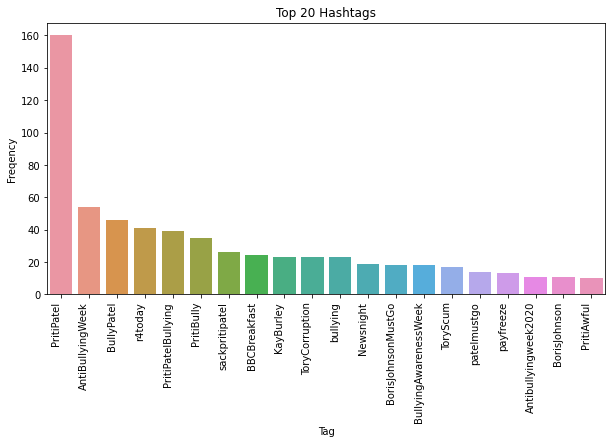

In [35]:
plot = sns.barplot(x='index', y='tag', data=plot_tag_data)
plot.set_xticklabels(plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
plt.title("Top 20 Hashtags")
plt.xlabel('Tag')
plt.ylabel('Freqency')

fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

As usual, all the above can be condensed down into a few lines, and/or a small function...

In [36]:
# We made this one earlier
def extract_entity(entity_dict, entity_key):
    return entity_dict[entity_key]


def extract_entities(df, entity_column, entity_key, new_column_name):
     
    entity_data = df.explode(entity_column).copy()
    
    not_empty = ~entity_data[entity_column].isna()
    entity_data = entity_data[not_empty]
    
    entity_data[new_column_name] = entity_data[entity_column].apply(extract_entity, entity_key=entity_key)
    return entity_data
    

In [37]:
hashtag_data = extract_entities(df, entity_column='entities.hashtags',entity_key='text', new_column_name='tag')

In [38]:
subset = ['id','entities.hashtags','tag']
hashtag_data[subset]

,id,entities.hashtags,tag
13,1330136987232301058,"{'text': 'Johnson', 'indices': [0, 8]}",Johnson
80,1330136822849134593,"{'text': 'BullyingisNEVERok', 'indices': [218,...",BullyingisNEVERok
111,1330136754515550211,"{'text': 'Astroturfers', 'indices': [241, 254]}",Astroturfers
145,1330136672273633280,"{'text': 'bbcaq', 'indices': [66, 72]}",bbcaq
148,1330136669551464449,"{'text': 'PritiPatel', 'indices': [238, 249]}",PritiPatel
...,...,...,...
24204,1329684884118450177,"{'text': 'FollowBackFriday', 'indices': [254, ...",FollowBackFriday
24204,1329684884118450177,"{'text': 'FBPE', 'indices': [272, 277]}",FBPE
24205,1329523082202058754,"{'text': 'shapeshiftingcreep', 'indices': [81,...",shapeshiftingcreep
24205,1329523082202058754,"{'text': 'bullying', 'indices': [154, 163]}",bullying


With the way we've designed our function, we can apply it to any entities column...

In [39]:
df['entities.user_mentions']

2        [{'screen_name': 'BorisJohnson', 'name': 'Bori...
3                                                       []
10       [{'screen_name': 'UKChange', 'name': 'Change.o...
13                                                      []
36       [{'screen_name': 'YouTube', 'name': 'YouTube',...
                               ...                        
24209    [{'screen_name': 'talkRADIO', 'name': 'talkRAD...
24210    [{'screen_name': 'PaulBrandITV', 'name': 'Paul...
24211                                                   []
24212                                                   []
24213                                                   []
Name: entities.user_mentions, Length: 4658, dtype: object

In [40]:
user_mentions = extract_entities(df, entity_column='entities.user_mentions',entity_key='screen_name', new_column_name='mentioned')

In [41]:
subset = ['id','entities.user_mentions','mentioned']
user_mentions[subset]

,id,entities.user_mentions,mentioned
2,1330137019679432707,"{'screen_name': 'BorisJohnson', 'name': 'Boris...",BorisJohnson
10,1330136998124904449,"{'screen_name': 'UKChange', 'name': 'Change.or...",UKChange
36,1330136912443666432,"{'screen_name': 'YouTube', 'name': 'YouTube', ...",YouTube
40,1330136904109580289,"{'screen_name': 'ShazadAkbar', 'name': 'Mirza ...",ShazadAkbar
55,1330136875189858304,"{'screen_name': 'mariacaulfield', 'name': 'Mar...",mariacaulfield
...,...,...,...
24199,1329570682196402179,"{'screen_name': 'pritipatel', 'name': 'Priti P...",pritipatel
24209,1329676144745074689,"{'screen_name': 'talkRADIO', 'name': 'talkRADI...",talkRADIO
24209,1329676144745074689,"{'screen_name': 'JuliaHB1', 'name': 'Julia Har...",JuliaHB1
24209,1329676144745074689,"{'screen_name': 'mrstevenallen', 'name': 'Stev...",mrstevenallen


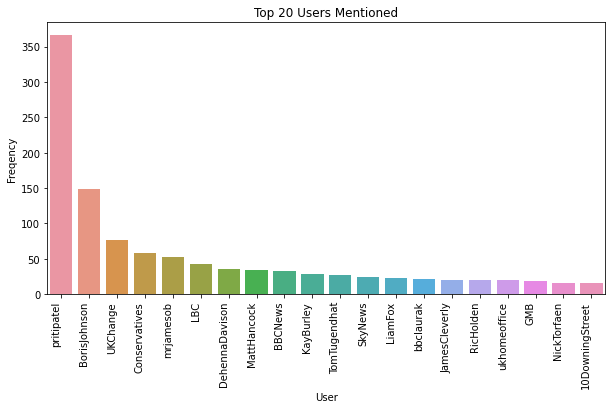

In [42]:
plot_data = user_mentions['mentioned'].value_counts().head(20).reset_index()

plot = sns.barplot(x='index', y='mentioned', data=plot_data)
plot.set_xticklabels(plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
plt.title("Top 20 Users Mentioned")
plt.xlabel('User')
plt.ylabel('Freqency')

fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

# Finding text
Sometimes it is useful to filter, or find Tweets based on their text content. For example in this debate, some mentioned John Bercow, as another case where bullying was mentioned. Let's create a variable that allows us to split our data based on whether Bercow is mentioned or not.

In [43]:
bercow_filter = df['full_text'].str.contains('bercow', case=False)

In [44]:
df['bercow_mentioned'] = df['full_text'].str.contains('bercow', case=False)

<AxesSubplot:xlabel='bercow_mentioned'>

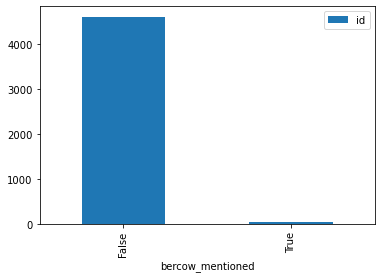

In [45]:
subset=['id','bercow_mentioned']
df[subset].groupby('bercow_mentioned').count().plot(kind='bar')

## Time Series of Tweets
Sometimes it is really useful to get a sense of the time distribution of tweets. We can use Time series information to...

- See trends such as peak times for particular topics
- Detect potential co-ordinated disinformation campaigns by examining...
  - the account creation date of all the accounts pushing a particular hashtag. Were a significant proportion of the accounts created in a small window of time?
  - the rate at which accounts are tweeting. Some accounts might tweets hundreds of times per hour - upwards of 50 is considered highly unusual.

To ensure Pandas understands that the information in a column is a date, we convert it into date format...

In [46]:
df['created_at'] = pd.to_datetime(df['created_at']) #easy!


In [50]:
# By changing to a list of datetime objects pandas can now tell us more useful information, such as the earliest and latest date in the dataset
df['created_at'].describe()

/Users/James/anaconda3/envs/teaching/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                          4658
unique                         4238
top       2020-11-20 07:59:33+00:00
freq                              4
first     2015-10-08 23:47:15+00:00
last      2020-11-21 14:44:06+00:00
Name: created_at, dtype: object

In [51]:
# we can also filter it, such as asking for dates only after a certain point

date_filter = df['created_at'] > "2020-11-20"
recent_tweets = df[date_filter]

We then want to group our data into periods of time. There is no point grouping our data just on the 'created_at' column, because every time stamp will be slightly different by a second or two. Grouping by time needs a special object called a `Grouper`.

First we create a grouper. We provide it two arguments
- The `key` which is the column you want to group by
- The `freq` which specifies the time period you want to group by for example 'd' for day, or 'h' for hour, or 'min' for minute.
- You can see all the options for freq [here in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)


In [52]:
time_grouper = pd.Grouper(key='created_at', freq='h')
plot_data = recent_tweets.groupby(time_grouper).count()['id'].reset_index()
plot_data.head()

,created_at,id
0,2020-11-20 00:00:00+00:00,12
1,2020-11-20 01:00:00+00:00,6
2,2020-11-20 02:00:00+00:00,0
3,2020-11-20 03:00:00+00:00,1
4,2020-11-20 04:00:00+00:00,3


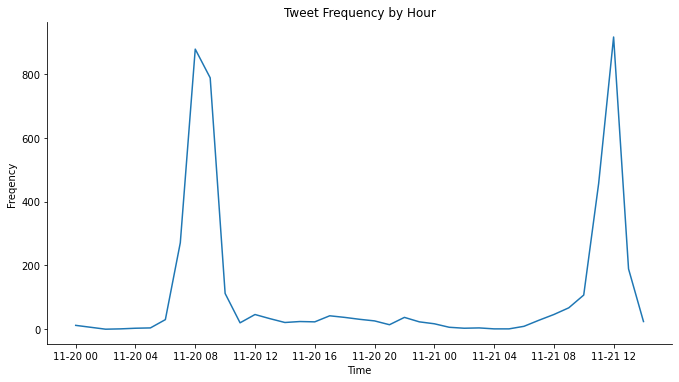

In [53]:
plot = sns.relplot(x='created_at', y='id', kind='line', data=plot_data,ci=None)

plt.title("Tweet Frequency by Hour")
plt.xlabel('Time')
plt.ylabel('Freqency')

fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [54]:
time_grouper = pd.Grouper(key='created_at', freq='h')
plot_data = recent_tweets.groupby(['bercow_mentioned',time_grouper]).count()['id'].reset_index()
plot_data.head()

,bercow_mentioned,created_at,id
0,False,2020-11-20 00:00:00+00:00,12
1,False,2020-11-20 01:00:00+00:00,6
2,False,2020-11-20 03:00:00+00:00,1
3,False,2020-11-20 04:00:00+00:00,3
4,False,2020-11-20 05:00:00+00:00,4


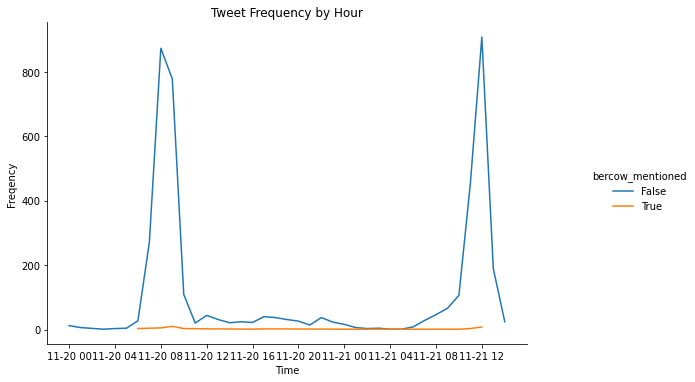

In [55]:
plot = sns.relplot(x='created_at', y='id', hue='bercow_mentioned', kind='line', data=plot_data,ci=None)

plt.title("Tweet Frequency by Hour")
plt.xlabel('Time')
plt.ylabel('Freqency')

fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

## A slightly more complex one putting together entities and time series

In [56]:
hashtag_data = extract_entities(recent_tweets, entity_column='entities.hashtags',entity_key='text', new_column_name='tag')

subset=['id','created_at','tag']
tag_time_data = hashtag_data[subset]
tag_time_data

,id,created_at,tag
13,1330136987232301058,2020-11-21 13:12:25+00:00,Johnson
80,1330136822849134593,2020-11-21 13:11:45+00:00,BullyingisNEVERok
111,1330136754515550211,2020-11-21 13:11:29+00:00,Astroturfers
145,1330136672273633280,2020-11-21 13:11:10+00:00,bbcaq
148,1330136669551464449,2020-11-21 13:11:09+00:00,PritiPatel
...,...,...,...
24190,1329690287275466754,2020-11-20 07:37:23+00:00,NeverTrustATory
24192,1329690589395357696,2020-11-20 07:38:35+00:00,gmb
24193,1329689822127124485,2020-11-20 07:35:32+00:00,PritiPatel
24204,1329684884118450177,2020-11-20 07:15:55+00:00,FollowBackFriday


In [57]:
top_five_tags = tag_time_data['tag'].value_counts().head(5).reset_index()['index'].tolist()
top_five_tags

['PritiPatel',
 'AntiBullyingWeek',
 'BullyPatel',
 'r4today',
 'PritiPatelBullying']

In [58]:
top_filter = tag_time_data['tag'].isin(top_five_tags)
top_data = tag_time_data[top_filter]
top_data

,id,created_at,tag
148,1330136669551464449,2020-11-21 13:11:09+00:00,PritiPatel
186,1330136551725142024,2020-11-21 13:10:41+00:00,PritiPatel
221,1330136452240388102,2020-11-21 13:10:17+00:00,PritiPatelBullying
495,1330135732229451776,2020-11-21 13:07:25+00:00,PritiPatel
565,1330135604517105664,2020-11-21 13:06:55+00:00,PritiPatel
...,...,...,...
24030,1329683438190923776,2020-11-20 07:10:10+00:00,PritiPatel
24097,1329654262457110528,2020-11-20 05:14:14+00:00,PritiPatel
24139,1329684626793766913,2020-11-20 07:14:54+00:00,r4today
24188,1329691714404163584,2020-11-20 07:43:03+00:00,PritiPatel


In [59]:
time_grouper = pd.Grouper(key='created_at', freq='h')
plot_data = top_data.groupby(['tag',time_grouper]).count()['id'].reset_index()
plot_data

,tag,created_at,id
0,AntiBullyingWeek,2020-11-20 07:00:00+00:00,10
1,AntiBullyingWeek,2020-11-20 08:00:00+00:00,6
2,AntiBullyingWeek,2020-11-20 09:00:00+00:00,9
3,AntiBullyingWeek,2020-11-20 10:00:00+00:00,1
4,AntiBullyingWeek,2020-11-20 12:00:00+00:00,1
...,...,...,...
63,r4today,2020-11-20 07:00:00+00:00,14
64,r4today,2020-11-20 08:00:00+00:00,19
65,r4today,2020-11-20 09:00:00+00:00,4
66,r4today,2020-11-21 08:00:00+00:00,1


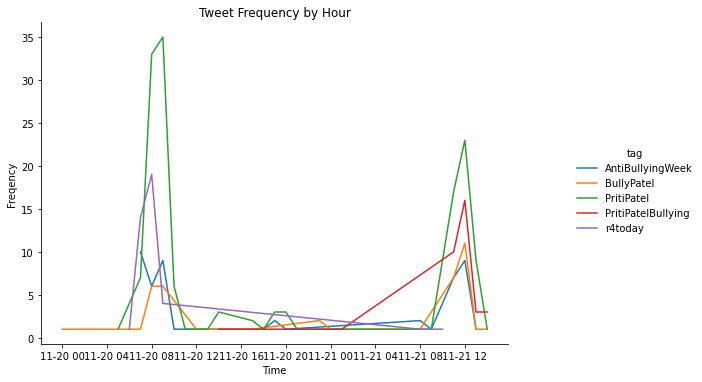

In [60]:
plot = sns.relplot(x='created_at', y='id', hue='tag', kind='line', data=plot_data,ci=None)

plt.title("Tweet Frequency by Hour")
plt.xlabel('Time')
plt.ylabel('Freqency')

fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()